## Before you start

Make sure you use google colab and have a GPU enabled.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/107.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 75.1MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 57.9MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 248.7ms
Speed: 14.9ms preprocess, 248.7ms inference, 27.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [14]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

from roboflow import Roboflow


rf = Roboflow(api_key="SgX139q1HDvc4HUGOaSk")
project = rf.workspace("roboflow-100").project("apples-fvpl5")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to apples-2 in yolov8:: 100%|██████████| 1406/1406 [00:00<00:00, 5921.36it/s]


## Custom Training

In [15]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 144MB/s] 
New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/apples-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

/content


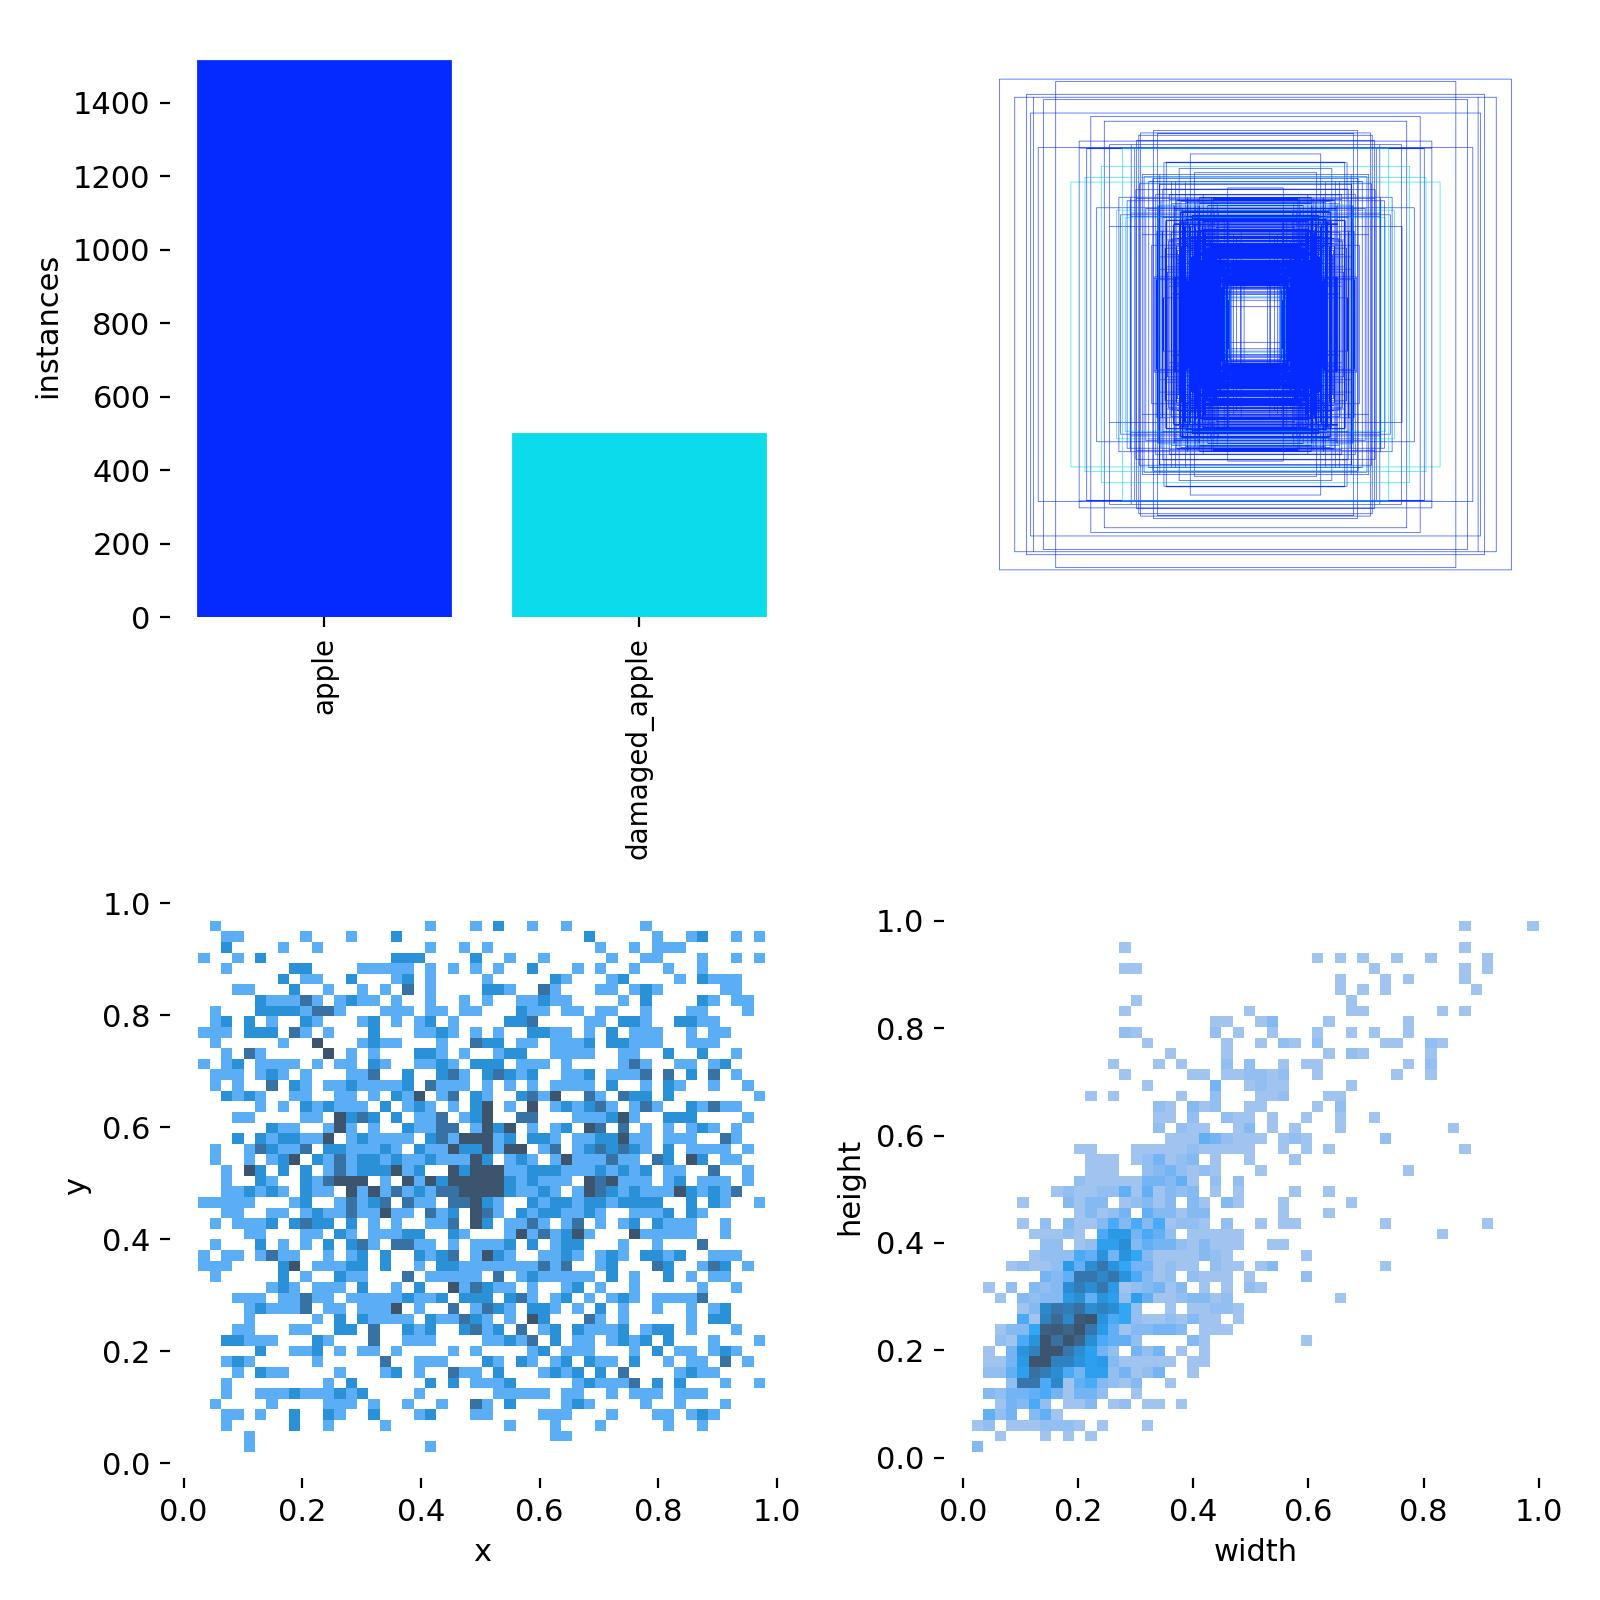

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels.jpg', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


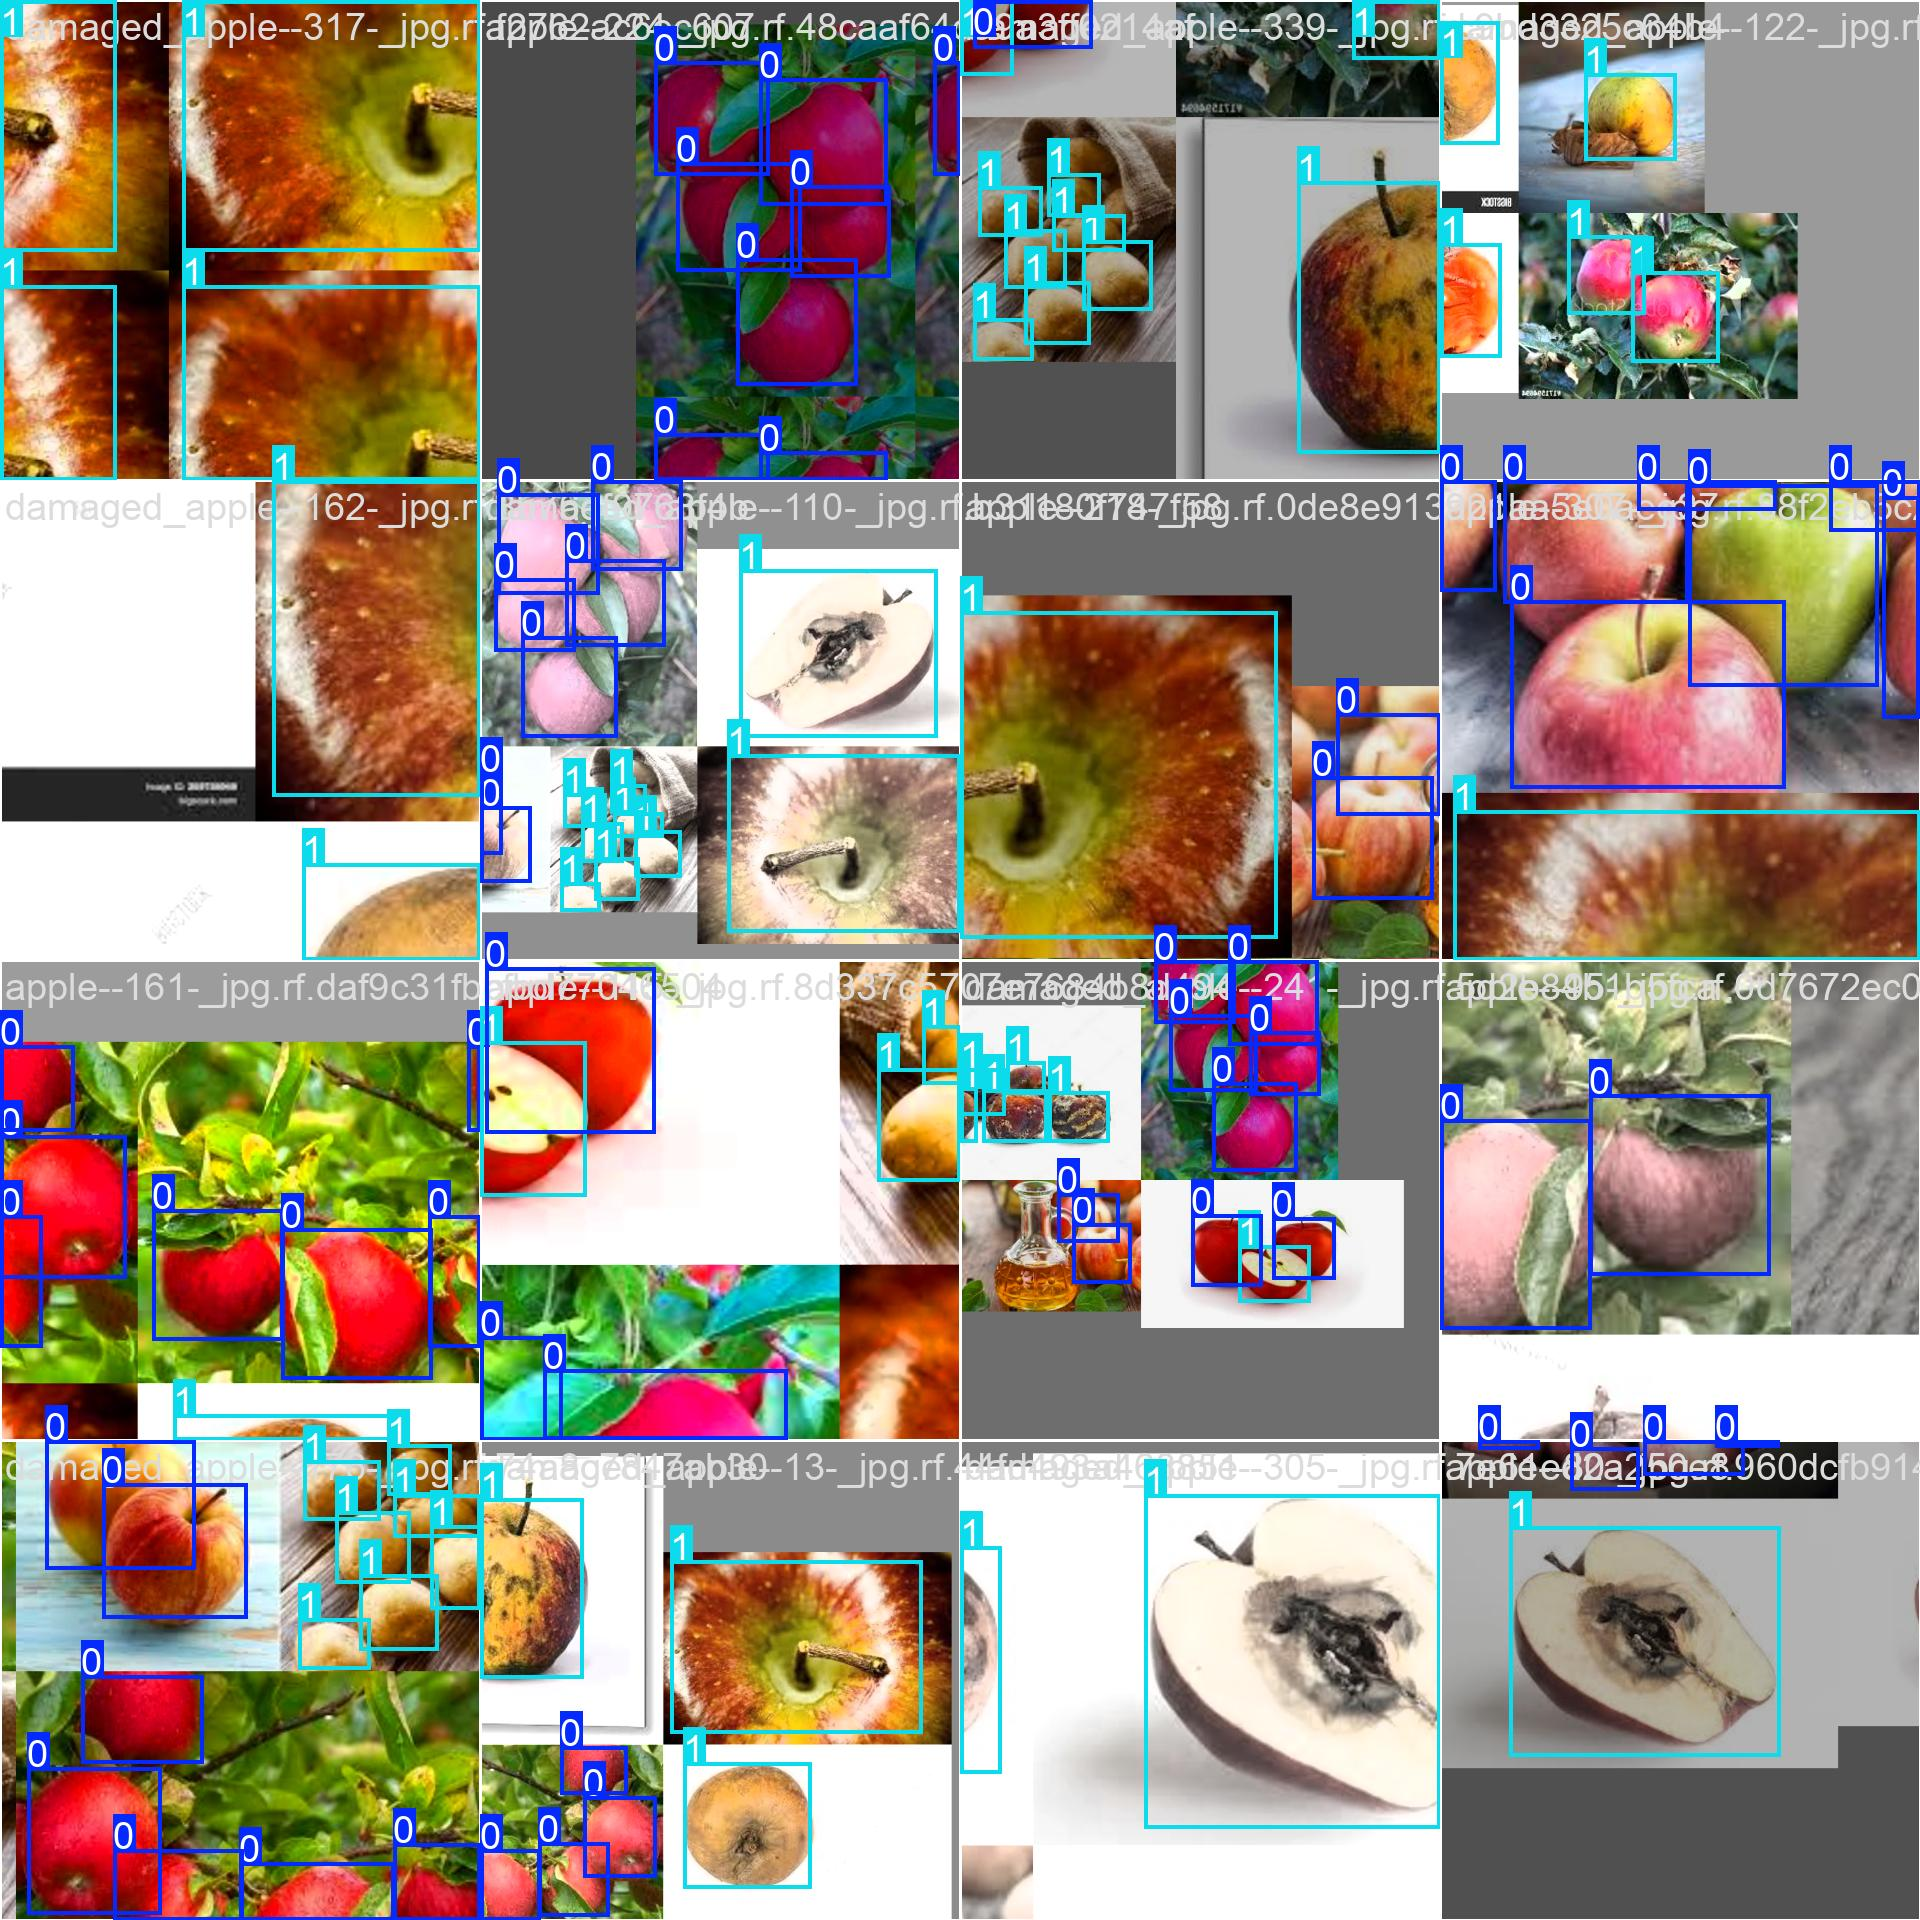

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

## Validate Custom Model

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/yolov8n.pt data={dataset.location}/data.yaml

/content
100% 6.25M/6.25M [00:00<00:00, 70.9MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/apples-2/valid/labels.cache... 178 images, 0 backgrounds, 0 corrupt: 100% 178/178 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:46<00:00,  3.85s/it]
                   all        178        723     0.0294     0.0297     0.0158    0.00837
                person        108        522     0.0587     0.0594     0.0317     0.0167
               bicycle        103        201          0          0          0          0
Speed: 6.8ms preprocess, 242.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/yolov8n.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/30 /content/datasets/apples-2/test/images/apple--1-_jpg.rf.7662faa1233b5fc07d695672f592c04f.jpg: 224x640 10 apples, 97.1ms
image 2/30 /content/datasets/apples-2/test/images/apple--10-_jpg.rf.464143fc334f48eea9338640b7e9714a.jpg: 640x480 1 apple, 190.5ms
image 3/30 /content/datasets/apples-2/test/images/apple--106-_jpg.rf.11daeb9bfb0c494ff46a33e480047527.jpg: 416x640 3 apples, 164.3ms
image 4/30 /content/datasets/apples-2/test/images/apple--11-_jpg.rf.a129f082778939fbd8c6ac070181daca.jpg: 640x640 (no detections), 256.3ms
image 5/30 /content/datasets/apples-2/test/images/apple--111-_jpg.rf.c8049fb0a31bd0c28a954edb1920c526.jpg: 384x640 2 apples, 140.4ms
image 6/30 /content/datasets/apples-2/test/images/apple--113-_jpg.rf.badc2d271ca429bd75a9b3213bdd2e6c.jpg: 480x640 3 apples, 1 orange, 167.9ms
image 7/30 /